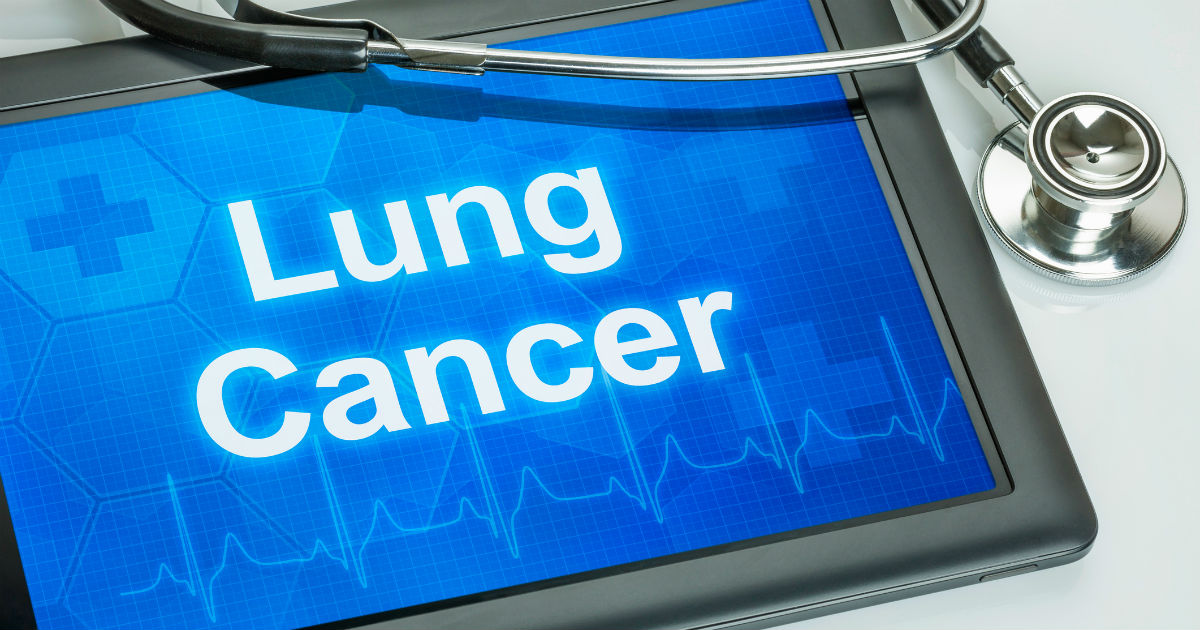



# Lung Cancer Prediction Project 
Problem Statement: A cancer that begins in the lungs and most often occurs in people who smoke.
Two major types of lung cancer are non-small cell lung cancer and small cell lung cancer. Causes of lung cancer include smoking, second-hand smoke, exposure to certain toxins and family history.
Symptoms include a cough (often with blood), chest pain, wheezing and weight loss. These symptoms often don't appear until the cancer is advanced.
Treatments vary but may include surgery, chemotherapy, radiation therapy, targeted drug therapy and immunotherapy.

In this project I'll build a machine learning model that can help in detecting/predicting **lung cancer** based on the following features: age, gender, blood pressure, smoke, coughing, allergies, fatigue etc.

Dataset Link:- The dataset used was gotten from this [Google Drive Link](https://drive.google.com/file/d/1diV8akPbsadSAn0rFzcLB7b3L9lL8Olw/view)

## Loading and Exploring the data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv("lung_cancer.csv")

In [20]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


So we can see our various features and our target variable which is the column **'LUNG_CANCER'**

In [21]:
print("Shape of data: ", data.shape)

Shape of data:  (309, 16)


We can see that the dataset contains 309 rows and 16 columns

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Datatype Conversion
We can see that the LUNG_CANCER column is an object data type so we'll convert the data into numerical data type by converting **YES to 1** and **NO to 0**.

We will also convert the other columns to numerical data types between 1 and 0 to help us when we're building the model.

In [23]:
data.loc[data['GENDER']=='M','GENDER'] = 1
data.loc[data['GENDER']=='F','GENDER'] = 0
data['GENDER'] = data['GENDER'].astype('int')
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [24]:
data.loc[data['LUNG_CANCER']=='YES','LUNG_CANCER'] = 1
data.loc[data['LUNG_CANCER']=='NO','LUNG_CANCER'] = 0
data['LUNG_CANCER'] = data['LUNG_CANCER'].astype('int')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


We have now changed the Gender and Lung_cancer columns to numerical values 1 and 0 where Male and having lung_cancer = 1 and Female and Not having Lung_Cancer = 0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [26]:
data["SMOKING"].replace({2: 1, 1: 0}, inplace=True)
data["YELLOW_FINGERS"].replace({2: 1, 1: 0}, inplace=True)
data["ANXIETY"].replace({2: 1, 1: 0}, inplace=True)
data["PEER_PRESSURE"].replace({2: 1, 1: 0}, inplace=True)
data["CHRONIC DISEASE"].replace({2: 1, 1: 0}, inplace=True)
data["FATIGUE "].replace({2: 1, 1: 0}, inplace=True)
data["ALLERGY "].replace({2: 1, 1: 0}, inplace=True)
data["WHEEZING"].replace({2: 1, 1: 0}, inplace=True)
data["ALCOHOL CONSUMING"].replace({2: 1, 1: 0}, inplace=True)
data["COUGHING"].replace({2: 1, 1: 0}, inplace=True)
data["SHORTNESS OF BREATH"].replace({2: 1, 1: 0}, inplace=True)
data["SWALLOWING DIFFICULTY"].replace({2: 1, 1: 0}, inplace=True)
data["CHEST PAIN"].replace({2: 1, 1: 0}, inplace=True)

In [27]:
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
175,0,59,1,1,1,1,1,1,0,1,0,1,0,1,1,1
28,0,53,1,1,1,0,1,0,0,1,1,0,1,1,1,1
198,0,73,1,1,1,0,1,0,1,0,1,0,0,0,0,1
72,1,67,0,0,0,0,1,1,1,1,1,1,1,0,1,1
104,0,72,1,1,1,1,0,1,0,0,0,1,1,1,1,1


In [28]:
data.rename(columns={"CHRONIC DISEASE": "CHRONIC_DISEASE",
                   "ALCOHOL CONSUMING": 'ALCOHOL_CONSUMPTION',
                    "SHORTNESS OF BREATH": "SHORTNESS_OF_BREATH",
                    "CHEST PAIN":"CHEST_PAIN",
                    "SWALLOWING DIFFICULTY": "SWALLOWING_DIFFICULTY"},
          inplace=True, errors='raise')

In [29]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [57]:
data.to_csv("processed_lung_cancer.csv")

We will also rename some columns so as to remove the white space in them

We have now converted the variables from "2" and "1" to "1" and "0".

In [30]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMPTION      0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

We can see that the data does not contain any missing values.

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,0.563107,0.496806,0.0,0.0,1.0,1.0,1.0
YELLOW_FINGERS,309.0,0.569579,0.495938,0.0,0.0,1.0,1.0,1.0
ANXIETY,309.0,0.498382,0.500808,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,309.0,0.501618,0.500808,0.0,0.0,1.0,1.0,1.0
CHRONIC_DISEASE,309.0,0.504854,0.500787,0.0,0.0,1.0,1.0,1.0
FATIGUE,309.0,0.673139,0.469827,0.0,0.0,1.0,1.0,1.0
ALLERGY,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0
WHEEZING,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0


## Exploratory Data Analysis

Total No. of Non-Lung Cancer Cases:  39
Total No. of Lung Cancer cases:  270


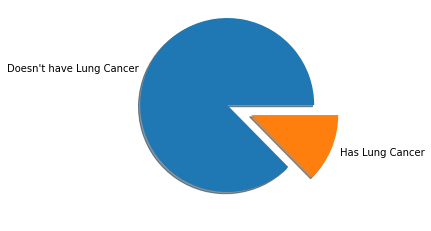

<Figure size 432x288 with 0 Axes>

In [32]:
len_lung_cancer = len(data['LUNG_CANCER'][data.LUNG_CANCER == 1])
len_not_lung_cancer = len(data['LUNG_CANCER'][data.LUNG_CANCER == 0])

arr = np.array([len_lung_cancer, len_not_lung_cancer])
labels = ["Doesn't have Lung Cancer", 'Has Lung Cancer']
print('Total No. of Non-Lung Cancer Cases: ', len_not_lung_cancer)
print('Total No. of Lung Cancer cases: ', len_lung_cancer)

plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
plt.show()
plt.savefig("pie1.png")

The Pie Chart helps us to see clearly the ratio of people with lung cancer and people who do not have lung cancer. 

We can also see that the data is imbalanced because the number of people who do not have lung cancer is way more than the number of people who have lung cancer. In other words our data is not equally distributed between classes.

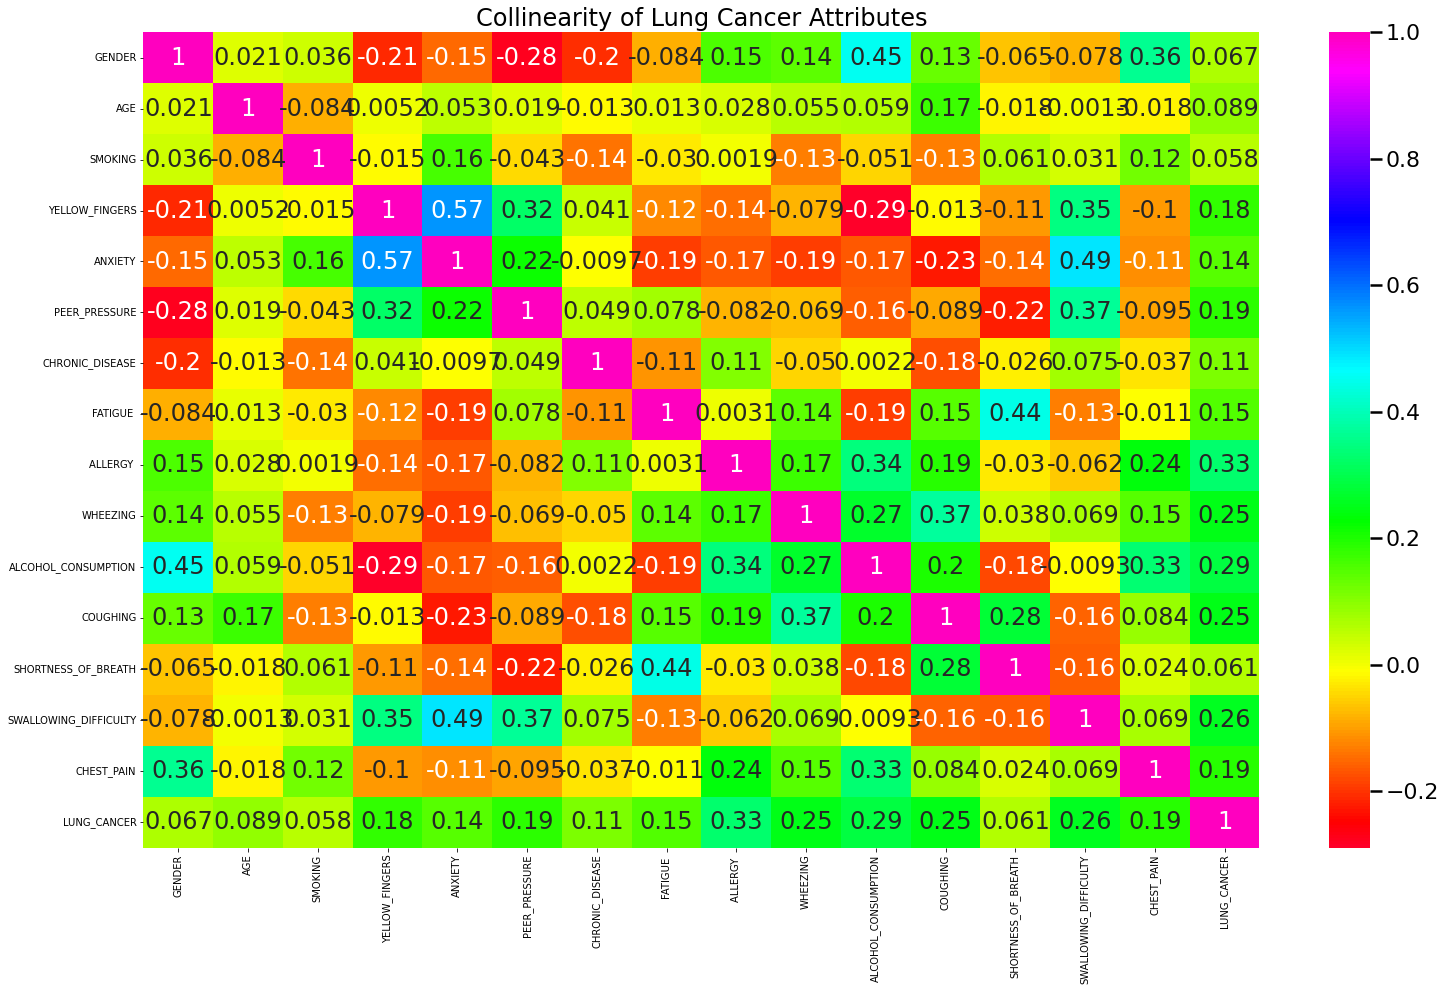

In [33]:
fig, ax = plt.subplots(figsize=(25,15))
sns.set_context('poster')
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='gist_rainbow', annot=True)
ax.set_title('Collinearity of Lung Cancer Attributes')
plt.savefig('cormap.png')

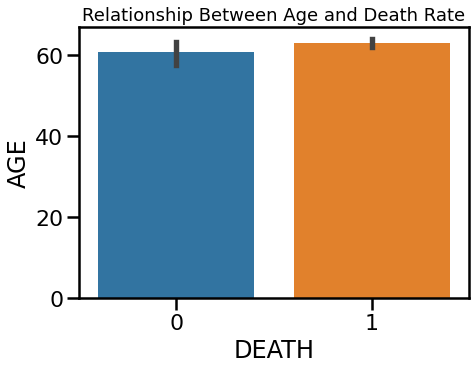

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x =data['LUNG_CANCER'], y = data['AGE'])
plt.xlabel("DEATH") 
plt.ylabel("AGE")
plt.title("Relationship Between Age and Death Rate", fontsize = 18)
plt.show()
plt.savefig('chart1.png')

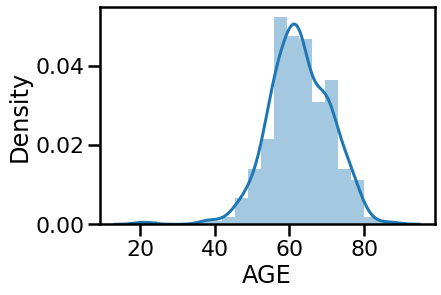

<Figure size 432x288 with 0 Axes>

In [35]:
# age distribution plot
sns.distplot(data['AGE'])
plt.show()
plt.savefig('ageplot.png')

## Splitting the Data

In [36]:
from sklearn.model_selection import train_test_split

X = data.drop("LUNG_CANCER", axis = 1)
y = data.LUNG_CANCER

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (309, 15)
Shape of y:  (309,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Engineering

In [38]:
def add_interaction(X):
    features = X.columns
    n = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(n):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, n):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
            
    return X_int

x_train_mod = add_interaction(X_train)
x_test_mod = add_interaction(X_test)

What the above function does is that it creates more feature columns by multiplying each column with another column and creates a new column for the product.

In [39]:
x_train_mod.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,...,ALCOHOL_CONSUMPTION_x_COUGHING,ALCOHOL_CONSUMPTION_x_SHORTNESS_OF_BREATH,ALCOHOL_CONSUMPTION_x_SWALLOWING_DIFFICULTY,ALCOHOL_CONSUMPTION_x_CHEST_PAIN,COUGHING_x_SHORTNESS_OF_BREATH,COUGHING_x_SWALLOWING_DIFFICULTY,COUGHING_x_CHEST_PAIN,SHORTNESS_OF_BREATH_x_SWALLOWING_DIFFICULTY,SHORTNESS_OF_BREATH_x_CHEST_PAIN,SWALLOWING_DIFFICULTY_x_CHEST_PAIN
7,0,51,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
45,1,72,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
97,1,59,1,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
92,1,52,1,0,0,0,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
198,0,73,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We can now see that we have 120 columns for the modified training set after applying the function.

## Model Building
The evaluate_model function below will be used to evaluate the accuracy of our model and also give the confusion matrix of our model.

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    
    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    plt.savefig('conf1.png')
    

### Logistic Regression
We will be using the Logistic Regression model as a baseline model.

In [41]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)

lr_clf_pred = lr_clf.predict(X_test)

Accuracy Score:  0.9032258064516129
Precision Score:  0.9107142857142857
Recall Score:  0.9807692307692307
Confusion Matrix:  [[ 5  5]
 [ 1 51]]


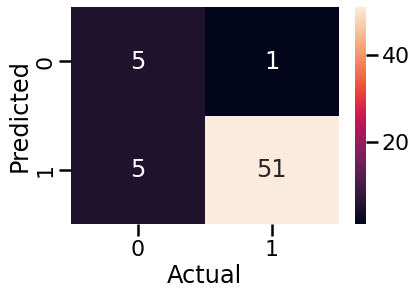

In [42]:
y_pred = lr_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Building Logistic Regression model with standardiser

Accuracy Score:  0.9032258064516129
Precision Score:  0.9107142857142857
Recall Score:  0.9807692307692307
Confusion Matrix:  [[ 5  5]
 [ 1 51]]


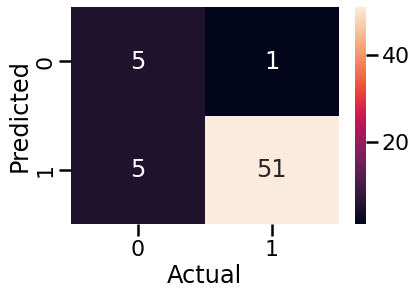

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pipe.fit(X_train, y_train)

y_pred1 = lr_clf_pipe.predict(X_test)
evaluate_model(y_test, y_pred1)

Support Vector Classifier
A support vector classifier (SVC) is a supervised machine learning model that uses classification algorithms for two-group classification problems.


In [44]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.898 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

Accuracy Score:  0.8870967741935484
Precision Score:  0.8947368421052632
Recall Score:  0.9807692307692307
Confusion Matrix:  [[ 4  6]
 [ 1 51]]


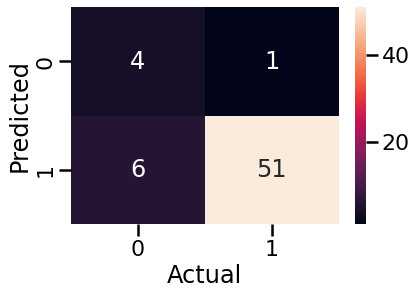

In [46]:
svc = SVC(C = 1000, gamma=0.0001)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
evaluate_model(y_test, y_pred2)

### Decision Tree Classifier and RandomizedSearchCV
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

**RandomizedSearchCV** implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs =20, clf = DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print("Training Score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Score: {:.3f}".format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy','gini'],
                     'splitter':['random','best'],
                     'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                     'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                     'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                     'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                     'max_leaf_nodes':[10,15,20,25,30,45,50,None],
                     'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                     'max_depth':[None, 2, 4, 6, 8],
                     'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training Score: 0.903
Test Score: 0.887


DecisionTreeClassifier(max_depth=4, max_features=0.7, max_leaf_nodes=20,
                       min_samples_leaf=0.02, min_weight_fraction_leaf=0.0025,
                       random_state=2)

Accuracy Score:  0.8387096774193549
Precision Score:  0.8387096774193549
Recall Score:  1.0
Confusion Matrix:  [[ 0 10]
 [ 0 52]]


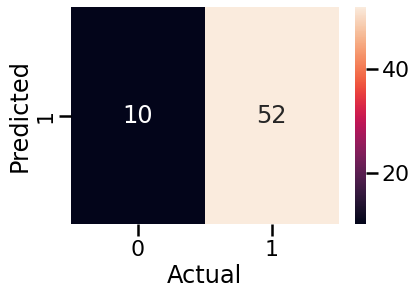

In [48]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.95,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=6, random_state=2)

ds_clf.fit(X_train, y_train)
pred4 = ds_clf.predict(X_test)
evaluate_model(y_test, pred4)

### Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [49]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params = {'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
                     'min_impurity_decrease':[0.0, 0.001, 0.05, 0.10, 0.15, 0.2],
                     'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40],
                     'max_depth':[None, 2, 4, 6, 8, 10, 20],
                           }, clf = RandomForestClassifier(random_state=2))

Training Score: 0.891
Test Score: 0.871


RandomForestClassifier(max_features=0.55, min_samples_leaf=2, random_state=2)

Accuracy Score:  0.8709677419354839
Precision Score:  0.8793103448275862
Recall Score:  0.9807692307692307
Confusion Matrix:  [[ 3  7]
 [ 1 51]]


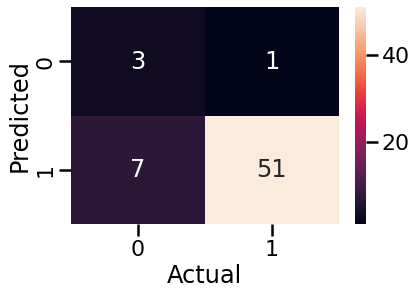

In [50]:
rf_clf = RandomForestClassifier(max_features=0.55, min_samples_leaf=2, random_state=2)
rf_clf.fit(X_train, y_train)
pred5 = rf_clf.predict(X_test)
evaluate_model(y_test, pred5)

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [51]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]

xgb1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.63465
[1]	validation_0-logloss:0.58730
[2]	validation_0-logloss:0.54771
[3]	validation_0-logloss:0.51549
[4]	validation_0-logloss:0.48520
[5]	validation_0-logloss:0.45911
[6]	validation_0-logloss:0.43683
[7]	validation_0-logloss:0.41859
[8]	validation_0-logloss:0.40186
[9]	validation_0-logloss:0.38749
[10]	validation_0-logloss:0.37573
[11]	validation_0-logloss:0.36300
[12]	validation_0-logloss:0.35473
[13]	validation_0-logloss:0.34662
[14]	validation_0-logloss:0.33785
[15]	validation_0-logloss:0.32986
[16]	validation_0-logloss:0.32511
[17]	validation_0-logloss:0.31981
[18]	validation_0-logloss:0.31483
[19]	validation_0-logloss:0.30981
[20]	validation_0-logloss:0.30530
[21]	validation_0-logloss:0.30302
[22]	validation_0-logloss:0.30044
[23]	validation_0-logloss:0.29638
[24]	validation_0-logloss:0.29195
[25]	validation_0-logloss:0.28934
[26]	validation_0-logloss:0.28842
[27]	validation_0-logloss:0.28702
[28]	validation_0-logloss:0.28569
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy Score:  0.8870967741935484
Precision Score:  0.8947368421052632
Recall Score:  0.9807692307692307
Confusion Matrix:  [[ 4  6]
 [ 1 51]]


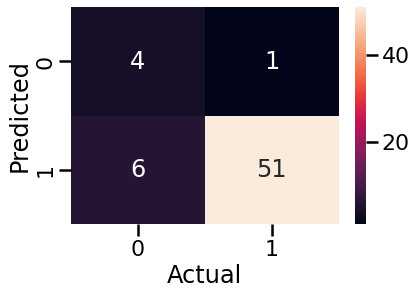

In [52]:
pred6 = xgb1.predict(X_test)
evaluate_model(y_test, pred6)

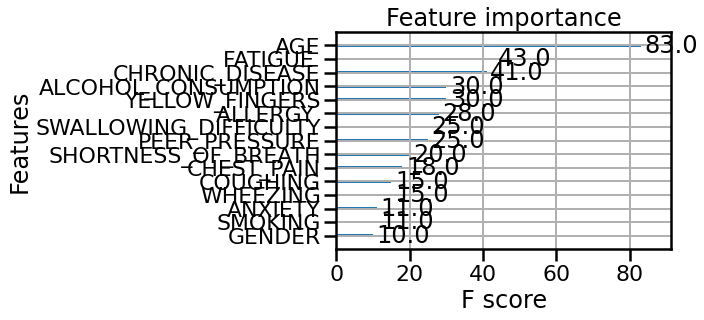

<Figure size 432x288 with 0 Axes>

In [53]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()
plt.savefig('xgb1.png')

### Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

Accuracy Score:  0.9032258064516129
Precision Score:  0.9107142857142857
Recall Score:  0.9807692307692307
Confusion Matrix:  [[ 5  5]
 [ 1 51]]


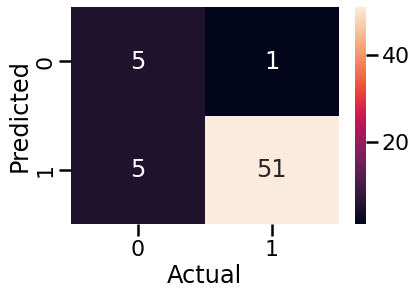

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, max_depth=1, random_state=0)
gbdt.fit(X_train, y_train)

pred_gbdt = gbdt.predict(X_test)
evaluate_model(y_test, pred_gbdt)

## Final Selection
After evaluating different classification algorithms we can see that the GradientBoostingClassifier had the best accuracy therefore we will use this algorithm as our final model.

In [55]:
import joblib
joblib.dump(gbdt, 'lung_cancer_predictor_model.pkl')
model = joblib.load('lung_cancer_predictor_model.pkl')
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [56]:
predictions = model.predict(X_test)
df_pred = pd.DataFrame(predictions)
df_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


In [58]:
!pip freeze

aiohttp==3.8.1
aiosignal==1.2.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==4.2.0
altgraph==0.17.2
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.1
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
analytics-python==1.4.0
anyio==3.6.1
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow @ file:///C:/ci/arrow_1617738834352/work
asgiref==3.5.2
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid==2.6.5
astropy @ file:///C:/ci/astropy_1629829318700/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeout==4.0.2
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1620866417880/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work


boto==2.49.0
Bottleneck @ file:///C:/ci/bottleneck_1607557040328/work
branca==0.4.2
brotlipy==0.7.0
bs4==0.0.1
cached-property @ file:///tmp/build/80754af9/cached-property_1600785575025/work
cachetools==5.0.0
certifi==2021.10.8
cffi @ file:///C:/ci/cffi_1625831756778/work
chardet @ file:///C:/ci/chardet_1607706937985/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click==8.0.3
cloudpickle @ file:///tmp/build/80754af9/cloudpickle_1632508026186/work
clyent==1.2.2
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
comtypes==1.1.10
conda==4.10.3
conda-build==3.21.6
conda-content-trust @ file:///tmp/build/80754af9/conda-content-trust_1617045594566/work
conda-pack @ file:///tmp/build/80754af9/conda-pack_1611163042455/work
conda-package-handling @ file:///C:/ci/conda-package-handling_1618262410900/work
conda-repo-cli @ file:///tmp/build/80754af9/conda-repo-cli_1620168426516/work
conda-token @ file:///tmp/build/80754af9/conda-token_162

In [59]:
!pip install pipreqs

In [62]:
!pipreqs --force

INFO: Successfully saved requirements file in C:\Users\IFEANYI PC\Documents\Tutorials\Data Science\Lung Cancer Prediction\requirements.txt
